In [1]:
import astropy.table as astab
from isochrones import BinaryStarModel,get_ichrone
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from corner import corner
import arviz as az

Holoviews not imported. Some visualizations will not be available.


In [2]:
hq_joker_edr3_apogee_tess_df = astab.Table.read("/Users/kjaehnig/CCA_work/GAT/dr17_joker/unimodal_joker_sample_joined_w_tess_edr3_REDUX.fits").to_pandas()

In [3]:
def generate_params_for_multinest(ticnum):
    
    ticrow = hq_joker_edr3_apogee_tess_df.loc[hq_joker_edr3_apogee_tess_df['ID'] == ticnum]

    params = {
        'Teff':(ticrow.TEFF.squeeze(),ticrow.TEFF_ERR.squeeze()),
        'logg':(ticrow.LOGG.squeeze(),ticrow.LOGG_ERR.squeeze()),
        'feh':(ticrow.M_H.squeeze(), ticrow.M_H_ERR.squeeze()),
        'H':(ticrow.H.squeeze(), 0.02),
        'J':(ticrow.J.squeeze(),0.02),
        'K':(ticrow.K.squeeze(),0.02),
        'BP':(ticrow.phot_bp_mean_mag.squeeze(),0.002),
        'RP':(ticrow.phot_rp_mean_mag.squeeze(),0.002),
        'G':(ticrow.phot_g_mean_mag.squeeze(),0.001),
        'parallax':(ticrow.parallax.squeeze(), ticrow.parallax_error.squeeze())
    }
    
    return params


In [15]:
def initialize_multinest_binary_model(ticnum):
    
    params = generate_params_for_multinest(ticnum)
    
    mist = get_ichrone('mist', bands=['J','H','K','BP','RP','G'])
    
    binarymodel = BinaryStarModel(mist, **params, name=f'TIC_{ticnum}')
    
#     distance = 1000./params['parallax'][0]
    
    binarymodel.set_bounds(eep=(202,1400), age=(7,11.))
    
    return binarymodel

In [16]:
binmod = initialize_multinest_binary_model(99254945)

In [ ]:
binmod.fit(n_live_points=1000,overwrite=True)

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 1000
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997151
Replacements:                               1050
Total Samples:                              1053
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -39758.163416 +/-  0.999525
Acceptance Rate:                        0.990099
Replacements:                               1100
Total Samples:                              1111
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):  -39758.217033 +/-  0.999550
Acceptance Rate:                        0.984589
Replacements:                               1150


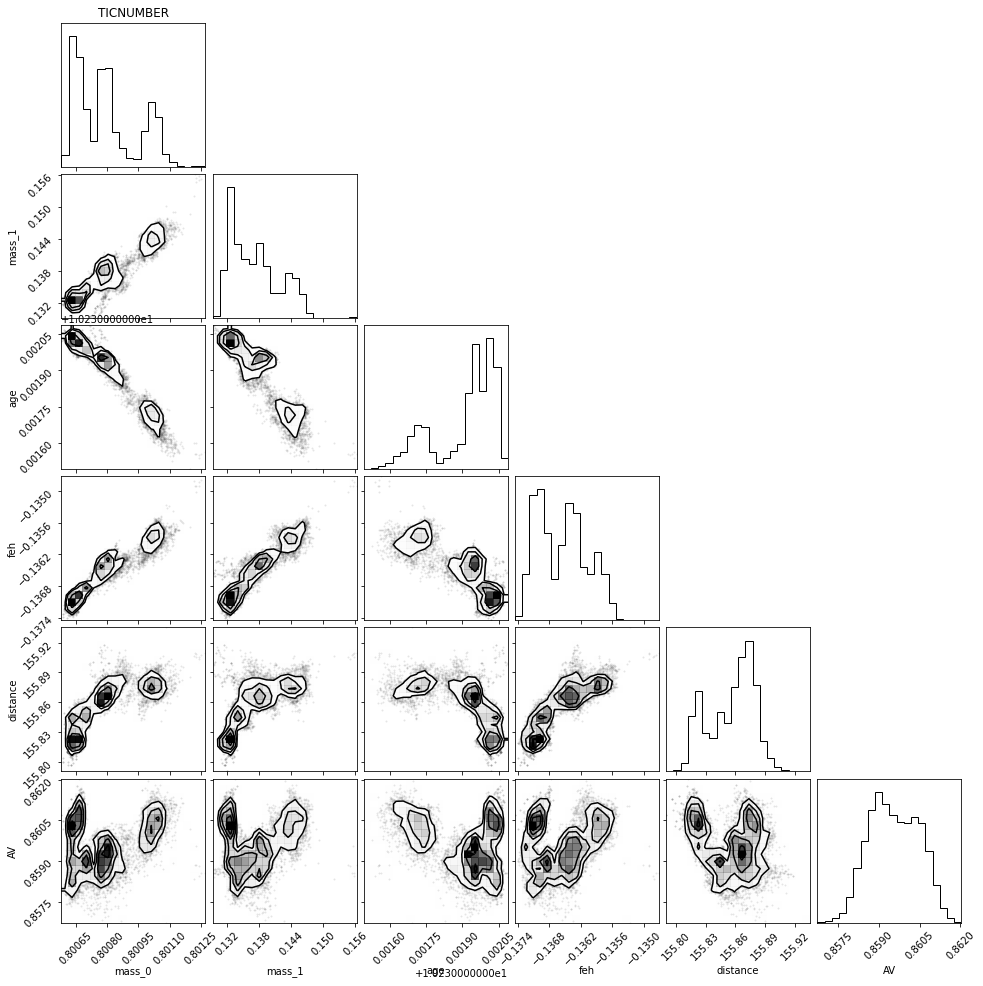

In [11]:
fig = corner(az.from_dict(binmod.derived_samples[['mass_0','mass_1','age','feh','distance','AV']].to_dict('list')))
fig.axes[0].set_title("TICNUMBER")
plt.savefig("testcorner.png",dpi=150,bbox_inches='tight')


In [14]:
binmod.derived_samples['age'].mean()

10.23191337668353

In [65]:
tic_systems_of_interest = [28159019,99254945,126232983,164458426,164527723,165453878,169820068,258108067,271548206,272074664,20215452,144441148,365204192]
file = open("/Users/kjaehnig/CCA_work/GAT/tic_systems_of_interest.txt",'w')
for ticnum in tic_systems_of_interest:
    file.write(f'TIC_{ticnum}\n')
file.close()

In [ ]:

for ticsystem in tic_systems_of_interest:
    binmod = initialize_multinest_binary_model(ticsystem)
    binmod.fit(n_live_points=2000, overwrite=True)
    fig = corner(az.from_dict(binmod.derived_samples[['mass_0','mass_1','age','feh','distance','AV']].to_dict('list')))
    fig.axes[0].set_title(f'TIC-{ticsystem}')
    plt.savefig(f"/Users/kjaehnig/CCA_work/GAT/figs/tic_{ticsystem}_multinest_corner.png",dpi=150,bbox_inches='tight')
    plt.close()
    binmod.save_hdf(f"/Users/kjaehnig/CCA_work/GAT/pymultinest_fits/tic_{ticsystem}_binary_model_obj.hdf",overwrite=True)

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 2000
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        1.000000
Replacements:                               2050
Total Samples:                              2050
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):   -9815.982673 +/-  0.999756
Acceptance Rate:                        1.000000
Replacements:                               2100
Total Samples:                              2100
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z):   -9816.006771 +/-  0.999762
Acceptance Rate:                        0.998143
Replacements:                               2150


ERROR: Interrupt received: Terminating
Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x154591310>
Traceback (most recent call last):
  File "/Users/kjaehnig/CCA_work/GAT/gatenv/lib/python3.9/site-packages/pymultinest/run.py", line 218, in loglike
    def loglike(cube, ndim, nparams, lnew, nullcontext):
  File "/Users/kjaehnig/CCA_work/GAT/gatenv/lib/python3.9/site-packages/pymultinest/run.py", line 70, in interrupt_handler
    sys.exit(1)
SystemExit: 1


Acceptance Rate:                        0.250715
Replacements:                              29000
Total Samples:                            115669
Nested Sampling ln(Z):              -1911.524322
Importance Nested Sampling ln(Z):     -23.751261 +/-  0.999996
Acceptance Rate:                        0.250476
Replacements:                              29050
Total Samples:                            115979
Nested Sampling ln(Z):              -1893.747535
Importance Nested Sampling ln(Z):     -23.773325 +/-  0.999996
Acceptance Rate:                        0.250105
Replacements:                              29100
Total Samples:                            116351
Nested Sampling ln(Z):              -1871.123959
Importance Nested Sampling ln(Z):     -23.800013 +/-  0.999996
Acceptance Rate:                        0.249829
Replacements:                              29150
Total Samples:                            116680
Nested Sampling ln(Z):              -1851.472857
Importance Nested Sampling 